# 0. Introdução

## 0.1) Base de dados PeNSE

Este trabalho tem o objetivo de trazer reflexões sobre o bullying e de seus efeitos em alunos do 9º ano (antiga 8ª série) do ensino fundamental no Brasil.

Foi utilizada a base de dados PeNSE (Pesquisa Nacional de Saúde Escolar); esta base investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  

A base de dados PeNSE 2015 (Pequisa Nacional de Saúde do Escolar) foi organizada com base em questionários preenchidos por mais de 100 mil estudantes brasileiros de todo o país, com suas percepções sobre saúde, violência, ambiente familiar, nutrição, comportamento de risco e prática de atividade física, entre outros.

Fonte: https://www.ibge.gov.br/estatisticas/sociais/populacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=sobre

O vídeo a seguir traz mais informações sobre a base de dados PeNSE.

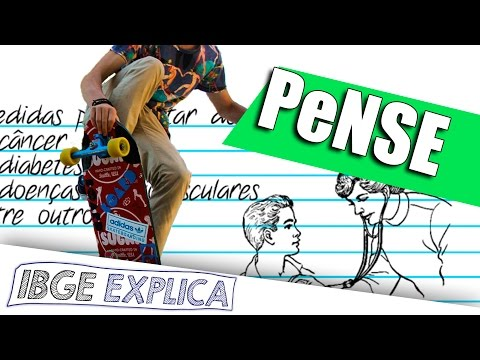

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('z4BBCHZUvD4',width = 800, height=600)

## 0.2) Sobre o bullying

Bullying constitui-se num relacionamento interpessoal caracterizado por um desequilíbrio de forças, o que pode ocorrer de várias maneiras: o alvo da agressão pode ser fisicamente mais fraco, ou pode perceber-se como sendo física ou mentalmente mais fraco que o perpetrador. 

Pode existir uma diferença numérica, em que vários estudantes agem contra uma única vítima.

No bullying existe a intenção de prejudicar, humilhar, e tal comportamento persiste por certo tempo, sendo mantido pelo poder exercido sobre a vítima, seja pela diferença de idade, força, ou gênero.

Existem três elementos cruciais que caracterizam o bullying, aceitos por cientistas ao redor do mundo, que são a repetição, o prejuízo e a desigualdade de poder.

A vítima de bullying é aquela criança que é constantemente agredida pelos colegas e, geralmente, não consegue cessar ou reagir aos ataques. Apresenta-se mais vulnerável à ação dos agressores por algumas características físicas, comportamentais ou emocionais. Podemos citar, dentre elas, o fato de ter poucos amigos, ser passivo, retraído e possuir baixa autoestima. 

A criança ainda pode ser vítima e agressor ao mesmo tempo;  tais crianças podem apresentar baixa autoestima, atitudes agressivas e prováveis alterações psicológicas. Podem ainda ser depressivas, ansiosas e inseguras, procurando humilhar os colegas para encobrir suas limitações. Geralmente apresentam dificuldades com o comportamento impulsivo, reatividade emocional e hiperatividade.

**Fonte:** "Bullying: prevalência, implicações e diferenças entre os gêneros", BANDEIRA, C. M; HUTZ, C. S., Psicologia Escolar e Educacional, 2012.

O vídeo a seguir é um relato de uma mãe que identificou o bullying e os males que esta violência estava causando à sua filha, Vitória. A garota era vítima na escola e sofreu com dificuldades de relacionamento entre os colegas e também com problemas no sono, afetando toda a sua estrutura psicológica. Destaca-se também o papel que a escola tem para proteger a criança deste tipo de violência.

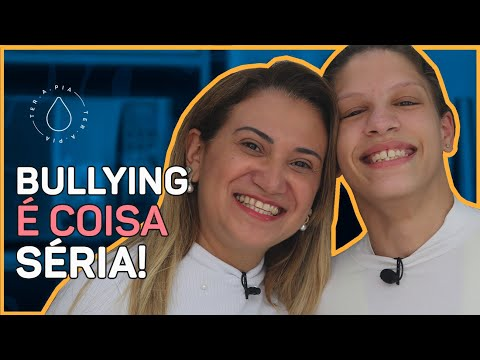

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('3BWW4p9I9aw',width = 800, height=600)

# 1. Preparação da base e declarações de funções utilizadas no estudo

## 1.1 Leitura da Base de Dados - PeNSE 2015 (Amostra 1)

Para este trabalho foi escolhida a amostra 1 da base PeNSE 2015, que é composta exclusivamente por escolares frequentando o 9º ano do ensino fundamental.

In [3]:
import pandas as pd
dados = pd.read_csv('data/PENSE_AMOSTRA1_ALUNOESCOLA.CSV', sep=";", thousands = ".", decimal=",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,...,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,...,1,1,1,1,1,1,1,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,...,1,1,1,1,1,1,1,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,...,1,1,1,1,1,1,1,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,...,1,1,1,1,1,1,1,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,...,1,1,1,1,1,1,1,5,1,1787


In [4]:
# definição da variável que controla o número da tabela
num_tabela = 0

## 1.2 Função para acessar o arquivo .xls "Dicionário" disponível no arquivo .zip da base PeNSE 2015

In [5]:
caminho_dicionario = 'data/Dicionario_PENSE_Microdados_Amostra1.xls'

def dicionario(pergunta, aba):
    if aba == "aluno":
        nome_aba = "AMOSTRA1_ALUNO"
    elif aba == "escola":
        nome_aba = "AMOSTRA1_ESCOLA"
    else:
        return("Aba não encontrada")

    d = pd.read_excel(caminho_dicionario, sheet_name=nome_aba)

    encontrou = False
    alternativas = {}

    for index, row in (d.iterrows()):
        valor = d.loc[index][0]

        if type(valor) == str:
            if valor.isnumeric() == True:
                valor = int(valor)

        if encontrou == True and (type(valor) == int or type(valor) == float):
            ind_alt = int(d.loc[index][0])
            txt_alt = d.loc[index][1]
            alternativas[ind_alt] = txt_alt

        if encontrou == True and (type(valor) != int and type(valor) != float):
            return {pergunta: p, "alternativas":alternativas}

        if valor == pergunta:
            p = d.loc[index][1]
            encontrou = True

        if index == (len(d)-1):
            return("Pergunta não encontrada")

In [6]:
## instruções para uso do dicionário (função acima)

# caso queria apenas a pergunta
print(dicionario ('VB02025',"aluno")['VB02025'])
print("\n")

# caso queria apenas as alternativas da pergunta:
print(dicionario ('VB02025',"aluno")['alternativas'])
print("\n")

# exemplo de uso de pergunta da aba "escola"
print(dicionario("V0008","escola"))

NOS ÚLTIMOS 30 DIAS, quantas vezes por dia você normalmente comeu frutas frescas ou salada de frutas?


{1: 'Não comi frutas nos últimos 30 dias', 2: 'Menos de uma vez por dia (não comi todos os dias)', 3: '1 vez por dia', 4: '2 vezes por dia', 5: '3 vezes por dia', 6: '4 vezes por dia', 7: '5 ou mais vezes por dia', 99: 'Não informado'}


{'V0008': 'Esfera Administrativa da escola', 'alternativas': {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}}


## 1.3 Função para gerar as tabelas de frequência cruzada

In [7]:
def tabela(pergunta, aba_pergunta, titulo_tabela, pergunta_filtro = False, alternativas_filtro = False, texto_filtro = ""):
    global num_tabela
    num_tabela += 1

    df = dados
    print("TABELA {} \n".format(num_tabela))
  
    if (pergunta_filtro != False) and (alternativas_filtro != False):
        filtro = "{} == {}".format(pergunta_filtro,alternativas_filtro)
        df = dados.query(filtro)
        print(texto_filtro + "\n")

    alternativas = dicionario (pergunta,aba_pergunta)['alternativas']
    frequencia_cruzada = pd.crosstab(df[pergunta],df["V0008"],rownames=[" "],colnames=["Escola:"],normalize='columns').round(4)*100
    frequencia_cruzada.rename(index=alternativas,columns=tipo_escola,inplace=True)

    if aba_pergunta == "aluno":
        print("Pergunta aos alunos: " + titulo_tabela + "\n")
    elif aba_pergunta == "escola":
        print("Pergunta para o(a) diretor(a), coordernador(a) ou responsável pela escola: " + titulo_tabela + "\n")

    return(display(frequencia_cruzada))

## 1.4 Função para extração de frequência de considerando um contexto

In [8]:
# função para extração de frequência de considerando um contexto
# por exemplo: visualizar - dentro do contexto dos alunos que afirmam praticar bullying (pergunta_1 = "VB07009" e resposta_interesse = [1]) - qual a frequencia que eles sofrem bullying (pergunta_2 = "VB07007").

def extracao_frequencia(pergunta_1, pergunta_2, respostas_interesse):
    frequencia_cruzada = pd.crosstab(index=dados[pergunta_1], columns = [dados["V0008"],dados[pergunta_2]],normalize='columns').round(4)*100
    resp = respostas_interesse

    series = frequencia_cruzada.T[resp[0]]

    for i in resp[1:]:
        series = frequencia_cruzada.T[i] + series

    df1 = pd.DataFrame(series.loc[1])
    df1.columns = ["Escola Federal"]

    df2 = pd.DataFrame(series.loc[2])
    df2.columns = ["Escola Estadual"]

    df3 = pd.DataFrame(series.loc[3])
    df3.columns = ["Escola Municipal"]

    df4 = pd.DataFrame(series.loc[4])
    df4.columns = ["Escola Privada"]

    df_frequencia_extraida = pd.concat([df1, df2, df3, df4], axis=1)
    df_frequencia_extraida.rename(index=dicionario(pergunta_2,"aluno")['alternativas'], inplace=True)
    df_frequencia_extraida.index.name = ""

    quant_alternativas = len(dicionario(pergunta_2,"aluno")['alternativas'])

    # descartar "não informado"
    df_frequencia_extraida = df_frequencia_extraida[0:quant_alternativas-1]
    return(df_frequencia_extraida)

## 1.5 Função para plotar usando o plotly

In [9]:
extracao_frequencia("VB07009","VB07007",[1])

,Escola Federal,Escola Estadual,Escola Municipal,Escola Privada
,,,,
Nunca,8.97,11.81,10.85,12.49
Raramente,27.63,26.74,24.68,25.35
Às vezes,41.46,28.97,26.13,29.40
Na maior parte do tempo,58.33,31.40,31.09,31.01
Sempre,57.14,31.51,31.74,34.19


In [10]:
import numpy as np
import plotly.graph_objects as go
# para renderizar corretamente o gráfico no jupyter lab
import plotly.io as pio
pio.renderers.default = "iframe"

def plotar(df,titulo_grafico, editar_eixo_x = False, remover_federal = False):
    # variável que armazena o índice editado (ou não)
    indice = []

    df.replace(to_replace=0, value=np.nan, inplace=True)
    df.interpolate(inplace=True)
    df = df.round(2)

    fig = go.Figure()

    if editar_eixo_x == True:
        for eixo_x in df.index:
            posicao_nos = eixo_x.find("nos")
            # remover tudo o que for depois de "nos" (o -1 é para remover também o espaço antes)
            indice.append(eixo_x[0:posicao_nos - 1])

    elif editar_eixo_x == False:
        indice = df.index.tolist()

    if indice[3] == "Na maior parte do tempo":
        indice[3] = "Na maior parte<br>do tempo"
  
    fig.update_layout(template = 'plotly_white')
  
    if remover_federal == False:
        fig.add_trace(go.Scatter(x=indice,y=df['Escola Federal'],name='Escola Federal'))
        max_eixo_y = df.max(axis = 'columns', numeric_only=True).max()
    elif remover_federal == True:
        # considera o máximo valor para eixo desconsiderando as escolas federais
        max_eixo_y = df.drop(columns = ["Escola Federal"]).max(axis = 'columns', numeric_only=True).max()


    fig.add_trace(go.Scatter(x=indice, y=df['Escola Estadual'],name='Escola Estadual'))
    fig.add_trace(go.Scatter(x=indice, y=df['Escola Municipal'],name='Escola Municipal'))
    fig.add_trace(go.Scatter(x=indice, y=df['Escola Privada'],name='Escola Privada'))
  
    if len(indice)>5:
        tamanho_grafico = 1500
    else:
        tamanho_grafico = 1100
  

    fig.update_layout(template = 'seaborn',
                      autosize = False, 
                      width=tamanho_grafico,
                      height=500,
                      title={'text': titulo_grafico, 'xanchor': 'center','yanchor': 'top','y':0.9,'x':0.5, 'font': {'size':22}},
                      font={'size': 18.5,'color':"black"},
                      yaxis=dict(range=[0,max_eixo_y+5])
                     )
           
    fig.update_xaxes(tickangle=10, tickfont=dict(size=21))
    fig.show()


# 2. Análise da amostra PeNSE por tipo de escola em relação ao censo escolar 2015

A amostra utilizada neste estudo foi feita exclusivamente com alunos do 9º ano do ensino fundamental. 

Constata-se, após consultar o censo escolar 2015, que a amostra do PeNSE foi distribuída de maneira bastante próxima às quantidades de matrículas do 9º ano por tipo de escola (Tabela 1). As exceções são para as escolas privadas e municipais, com uma diferença de quase 6%.


**Fonte:**https://download.inep.gov.br/educacao_basica/censo_escolar/notas_estatisticas/2017/notas_estatisticas_do_censo_escolar_2015_matriculas.pdf  (página 17)


In [11]:
quantidade_alunos_amostra = dados["V0008"].value_counts().to_frame()
tipo_escola = dicionario("V0008","escola")['alternativas']

quantidade_alunos_amostra.index = quantidade_alunos_amostra.index.map(tipo_escola)
quantidade_alunos_amostra.columns = ["Quant. de alunos da amostra"]
quantidade_alunos_amostra["Porcentagem da amostra"] = (quantidade_alunos_amostra["Quant. de alunos da amostra"]/quantidade_alunos_amostra["Quant. de alunos da amostra"].sum()).round(3)*100

total_alunos_censo = 2809672
quantidade_alunos_amostra["Censo escolar 2015"] = [1373049/total_alunos_censo,  1021324/total_alunos_censo, 410965/total_alunos_censo, 4334/total_alunos_censo]
quantidade_alunos_amostra["Censo escolar 2015"] = quantidade_alunos_amostra["Censo escolar 2015"].round(3)*100


num_tabela += 1
print("TABELA {} - Distribuição da amostra PeNSE 2015 nas diferentes escolas e comparação com o censo escola 2015.\n".format(num_tabela))

quantidade_alunos_amostra

TABELA 1 - Distribuição da amostra PeNSE 2015 nas diferentes escolas e comparação com o censo escola 2015.



,Quant. de alunos da amostra,Porcentagem da amostra,Censo escolar 2015
Estadual,49462,48.5,48.9
Municipal,31404,30.8,36.4
Privada,20918,20.5,14.6
Federal,288,0.3,0.2


# 3. Análises sobre a prática de bullying no contexto escolar


## 3.1 Histórico de bullying, frequência nos últimos 30 dias e a causa.

Aproxidamente metade dos alunos, de todos os tipos de escolas, afirmam já terem sofrido bullying (Tabela 2).
Outra informação relevante é que a minoria significativa dos alunos desconhece o termo.

In [12]:
pergunta = dicionario('VB07010',"aluno")['VB07010']
tabela('VB07010',"aluno", pergunta)

TABELA 2 

Pergunta aos alunos: Você já sofreu bullying?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Sim,52.08,47.77,47.18,45.53
Não,47.57,50.06,50.18,53.50
Não sei o que é bullying,0.35,1.71,2.25,0.75
Não informado,0.00,0.45,0.40,0.22


Verifica-se que quase metade dos alunos, de todos os tipos de escolas, se sentiram, pelo menos uma vez, magoados, incomodados, aborrecidos, ofendidos ou humilhados em decorrência das atitudes de seus colegas nos últimos 30 dias (Tabela 3).
Fatia semelhante em relação àquela mostrada na Tabela 2.

Entretanto, conforme pode ser visto na Tabela 4, não é possível entender o motivo que levou a isso; verifica-se que a mesma fatia que respondeu "Nunca" na pergunta descrita na Tabela 3, pulou a pergunta do motivo, o que é coerente. Mas dentre os que se sentiram incomodados por alguma atitude dos colegas, a maioria apontou "Outro motivo".


In [13]:
pergunta = dicionario('VB07007',"aluno")['VB07007']
tabela('VB07007',"aluno", pergunta)

TABELA 3 

Pergunta aos alunos: NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Nunca,50.35,55.86,56.16,53.41
Raramente,26.39,21.06,20.40,25.87
Às vezes,14.24,15.40,16.33,14.34
Na maior parte do tempo,4.17,3.87,3.36,3.78
Sempre,4.86,3.14,3.14,2.40
Não informado,0.00,0.68,0.61,0.19


In [14]:
pergunta = dicionario('VB07008',"aluno")['VB07008']
tabela('VB07008',"aluno", pergunta)

TABELA 4 

Pergunta aos alunos: NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Pulo no questionário,50.35,56.54,56.77,53.60
A minha cor ou raça,3.12,2.44,2.44,1.67
A minha religião,0.35,1.55,1.69,1.08
A aparência do meu rosto,6.25,4.43,4.30,4.27
A aparência do meu corpo,8.33,6.62,6.45,7.47
A minha orientação sexual,0.35,0.92,0.75,0.81
A minha região de origem,1.39,0.57,0.59,0.64
Outros motivos/causas,29.17,26.50,26.63,30.05
Não informado,0.69,0.44,0.39,0.41


Apesar de 50% dos alunos afirmarem já terem sofrido bullying, inclusive nos últimos 30 dias, aproximadamente 20% afirmam praticarem, novamente em todos os tipos de escola da pesquisa (Tabela 5); ou seja, para cada aluno que pratica bullying, há pouco mais de dois alunos que assumem sofrer bullying.

Em nenhuma destas análises houve diferenças significativas entre os tipos de escolas.



In [15]:
pergunta = dicionario('VB07009',"aluno")['VB07009']
tabela('VB07009',"aluno", pergunta)

TABELA 5 

Pergunta aos alunos: NOS ÚLTIMOS 30 DIAS, você esculachou, zombou, mangou, intimidou ou caçoou algum de seus colegas da escola tanto que ele ficou magoado, aborrecido, ofendido ou humilhado?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Sim,22.92,18.95,17.47,19.48
Não,76.74,80.49,82.04,80.31
Não informado,0.35,0.56,0.49,0.21


## 3.2 Mas será que quem pratica bullying também sofre bullying?

Considerando as Tabelas 6 e 7, percebe-se um aumento - bastante significativo e independente do tipo de escola - na prática de bullying cometida por quem já sofreu, pelo menos **raramente**, bullying nos últimos 30 dias, em relação aos que **nunca** sofreram.

Será que tal aumento também vale para as demais frequências?
Para responder isso plota-se o gráfico ao final desta seção.

In [16]:
texto_filtro = "Considerando apenas os alunos que responderam 'Nunca' para a pergunta descrita na Tabela 3:"
pergunta = dicionario('VB07009',"aluno")['VB07009']
tabela('VB07009',"aluno", pergunta, "VB07007", "1", texto_filtro)

TABELA 6 

Considerando apenas os alunos que responderam 'Nunca' para a pergunta descrita na Tabela 3:

Pergunta aos alunos: NOS ÚLTIMOS 30 DIAS, você esculachou, zombou, mangou, intimidou ou caçoou algum de seus colegas da escola tanto que ele ficou magoado, aborrecido, ofendido ou humilhado?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Sim,8.97,11.81,10.85,12.49
Não,91.03,88.04,88.96,87.43
Não informado,0.00,0.15,0.20,0.08


In [17]:
texto_filtro = "Considerando apenas os alunos que responderam 'Raramente' para a pergunta descrita na Tabela 3:"
pergunta = dicionario('VB07009',"aluno")['VB07009']
tabela('VB07009',"aluno", pergunta, "VB07007", "2", texto_filtro)

TABELA 7 

Considerando apenas os alunos que responderam 'Raramente' para a pergunta descrita na Tabela 3:

Pergunta aos alunos: NOS ÚLTIMOS 30 DIAS, você esculachou, zombou, mangou, intimidou ou caçoou algum de seus colegas da escola tanto que ele ficou magoado, aborrecido, ofendido ou humilhado?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Sim,27.63,26.74,24.68,25.35
Não,72.37,73.18,75.18,74.56
Não informado,0.00,0.09,0.14,0.09


In [33]:
titulo_grafico = "Participação dos alunos que praticaram algum tipo de bullying nos<br>últimos 30 dias  pela frequência que sofreram bullying nos últimos 30 dias"

plotar(extracao_frequencia("VB07009","VB07007",[1]),titulo_grafico)

Verifica-se que quanto mais frequente o aluno se sentiu esculachado, intimidado ou caçoado por um ou mais colegas e que resultou em mágoa, aborrecimento, ofença ou humilhação, mais chances o aluno tem de cometer o mesmo ato, contra outro(s) estudante(s). Este aumento é cerca de 300% para os alunos que muito frequentemente foram vítimas de bullying em relação aos que não foram, nos últimos 30 dias.

# 4. Análises sobre as consequências do bullying no aluno

## 4.1 Quantidade de amigos

Há uma pergunta na pesquisa intitulada: "Quantos amigos(as) próximos você tem?", com as opções de resposta:
- Nenhum (0);
- 1 amigo;
- 2 amigos;
- 3 ou mais amigos".

Como o bullying pode levar o aluno ao isolamento perante os colegas, verifica-se a porcentagem dos alunos que alegam ter nenhum ou apenas um(a) amigo(a) próximo(a) em relação à frequência que sofreram algum tipo de bullying nos últimos 30 dias (Tabela 8). 

In [19]:
num_tabela += 1
print("TABELA {} - Porcentagem dos alunos que alegam ter nenhum ou apenas um(a) amigo(a) próximo(a) em relação à frequência que sofreram algum tipo de bullying nos últimos 30 dias.\n".format(num_tabela))
extracao_frequencia("VB12003","VB07007",[1,2])

TABELA 8 - Porcentagem dos alunos que alegam ter nenhum ou apenas um(a) amigo(a) próximo(a) em relação à frequência que sofreram algum tipo de bullying nos últimos 30 dias.



,Escola Federal,Escola Estadual,Escola Municipal,Escola Privada
,,,,
Nunca,6.21,10.35,9.64,6.37
Raramente,5.27,10.79,10.39,6.33
Às vezes,9.76,13.14,13.12,9.86
Na maior parte do tempo,0.00,18.19,15.83,16.20
Sempre,21.43,20.11,17.14,18.10


O valor 0.00 para a Escola Federal, na frequência "Na maior parte do tempo" significa que nenhum aluno deste tipo de escola assinalou a opção de ter 0 ou 1 amigo ao mesmo tempo que alegou ter sofrido algum tipo de bullying segundo esta frequência.

Tal acontecimento pode ocorrer perante uma amostra pequena (conforme pode ser visto na Tabela 1, a amostra dos alunos de escola Federal é a menor e não chega a 300 alunos).

O gráfico a seguir mostra a Tabela 8 de maneira ilustrada; para o valor nulo encontrado na "Escola Federal" foi feita uma interpolação média entre os valores vizinhos (valores das frequências 'Às vezes' e 'Sempre').

In [32]:
titulo_grafico = "Participação dos alunos que possuem zero ou apenas um(a) amigo(a)<br>próximo(a) pela frequência que sofreram bullying nos últimos 30 dias"
plotar(extracao_frequencia("VB12003","VB07007",[1,2]),titulo_grafico)

Nota-se considerável aumento dos alunos que apontam ter nenhum ou apenas um amigo conforme a frequência do sofrimento de algum tipo de bullying também aumenta. Chama a atenção o valor dobrado do número de alunos que dizem ter nenhum ou apenas um(a) amigo(a) próximo(a) e sofrem com muita frequência ("sempre") bullying em relação àqueles que dizem não terem sofrido bullying nos últimos 30 dias.

## 4.2 Sensação de solidão

Há uma outra pergunta na pesquisa intitulada: "Nos últimos 12 meses com que frequência tem se sentido sozinho(a)?", com opções de resposta:
- Nunca;
- Raramente;
- Às vezes;
- Na maioria das vezes;
- Sempre.

Já foi visto que quanto mais frequente um aluno sofre bullying, maiores as chances dele ter nenhum ou apenas um amigo próximo, o que é um indicativo de solidão.

O gráfico a seguir mostra a porcentagem dos alunos que alegam se sentirem sozinhos(as) "Na maioria das vezes" ou "Sempre" em relação à frequência que sofreram algum tipo de bullying nos últimos 30 dias.

In [35]:
titulo_grafico = "Participação dos alunos que se sentem sozinhos(as) 'na maioria das vezes' ou 'sempre'<br>nos últimos 12 meses pela frequência que sofreram bullying nos últimos 30 dias"
plotar(extracao_frequencia("VB12001","VB07007",[4,5]),titulo_grafico)

Constata-se, mais uma vez, o aumento da sensação de solidão nos alunos conforme a frequência do bullying sofrido aumenta. 

Mais intenso do que ocorreu na análise da quantidade de amigos, verifica-se valores mais que triplicados do número de alunos que se sentem constantemente sozinhos e sofrem com muita frequência ("sempre") bullying em relação àqueles que dizem não terem sofrido bullying nos últimos 30 dias.

## 4.3 Envolvimento em brigas físicas

Sabe-se que o aluno que sofre bullying pode apresentar um comportamento agressivo; a análise da seção 4.2 já mostrou que quanto mais bullying um aluno sofre, maiores as chances dele mesmo também praticar bullying com outro(s) colega(s).

Esta seção mostra a frequência no envolvimento em brigas físicas, declaradas pelo aluno, nos últimos 12 meses; para isso serão utilizadas as respostas da pergunta: "Nos últimos 12 meses , quantas vezes você se envolveu em briga (uma luta física)?", que apresenta as seguintes opções como resposta:

- Nenhuma vez nos últimos 12 meses (0 vez)
- 1 vez nos últimos 12 meses
- 2 a 3 vezes nos últimos 12 meses
- 4 a 5 vezes nos últimos 12 meses
- 6 a 7 vezes nos últimos 12 meses
- 8 a 9 vezes nos últimos 12 meses
- 10 a 11 vezes nos últimos 12 meses
- 12 ou mais nos últimos 12 meses

O gráfico a seguir mostra a porcentagem dos alunos que alegaram envolvimento em brigas físicas, em diferentes frequências nos últimos 12 meses, apenas considerando aqueles alunos que responderam sofrer bullying "Na maior parte do tempo" e "Sempre" nos últimos 30 dias.

Por haver muitas opções de respostas, precisa-se de considerável volume de dados; tal volume não está disponível para a Escola Federal, portanto ela foi removida desta análise.

In [37]:
titulo_grafico = "Participação dos alunos que sofreram bullying 'Na maior parte do tempo' ou 'Sempre' nos<br>últimos 30 dias pela frequência que se envolveram em brigas físicas nos últimos 12 meses."
plotar(extracao_frequencia("VB07007","VB09011",[4,5]),titulo_grafico, editar_eixo_x = True,remover_federal=True)

Percebe-se a presença cada vez maior de estudantes que sofreram bullying na "maior parte do tempo" e "sempre" nos últimos 30 dias conforme a frequencia de brigas físicas aumenta. Ou seja, quanto mais frequente um aluno se envolve em brigas físicas, maiores as chances dele sofrer bullying "na maior parte do tempo" ou "sempre"; para aqueles que alegaram terem brigado 12 vezes ou mais, 20% dos alunos também sofrem bullying com muita frequência.


Pode-se analisar também a participação em brigas daqueles que alegaram terem esculachado, zombado, magoado, intimidado ou caçoado de algum de seus colegas nos últimos 30 dias.

In [39]:
titulo_grafico = "Participação dos alunos (%) que alegaram terem praticado bullying nos últimos<br>30 dias pela frequência que se envolveram em brigas físicas nos últimos 12 meses."
plotar(extracao_frequencia("VB07009","VB09011",[1]),titulo_grafico, editar_eixo_x = True,remover_federal=True)

Mais uma vez constata-se um significativo aumento no número de alunos que admitem terem praticado algum tipo de bullying nos últimos 30 dias conforme a frequência de envolvimento em brigas físicas aumenta.

A alta frequência de brigas físicas por um aluno, portanto, pode ser um termômetro para a escola levantar a hipótese de que tal aluno está sofrendo e/ou praticando bullying e solicitar apoio do(a) psicólogo(a).

## 4.4 Qualidade do sono

É sabido que a vítima de bullying pode ter dificuldade em dormir e, consequentemente, ter seu desenvolvimento afetado.

A garota Vitória, cuja mãe concedeu a entrevista presente no vídeo da seção 2.2 sofreu com noites sem dormir, tamanha ansiedade/angústia decorrente do bullying.

Há uma pergunta na base de dados PeNSE 2015 que trata sobre alguma preocupação que afeta o sono: "Nos últimos 12 meses, com que frequência você não conseguiu dormir à noite porque algo o(a) preocupava muito?", onde traz as seguintes opções como resposta:

- Nunca;
- Raramente;
- Às vezes;
- Na maioria das vezes;
- Sempre.

O gráfico a seguir mostra a porcentagem dos alunos que alegaram não conseguirem dormir à noite porque algo o(a)s preocupavam muito "Na maioria das vezes" ou "Sempre" nos últimos 12 meses em relação à frequência que sofreram algum tipo de bullying nos últimos 30 dias.


In [41]:
titulo_grafico = "Participação dos alunos (%) que alegaram não dormir direito 'Na maioria das vezes' ou<br>'Sempre' nos últimos 12 meses pela frequência que sofreram bullying nos últimos 30 dias"
plotar(extracao_frequencia("VB12002","VB07007",[4,5]),titulo_grafico,remover_federal=False)

Nota-se quase o triplo de estudantes que alegaram dificuldades para dormir nos últimos 12 meses dentre os que dizem sofrer bullying na maior parte do tempo em relação àqueles que não sofreram bullying nos últimos 30 dias.

Novamente, não há diferenças entre os tipos de escola; como a escola Federal é a menor amostra, isso pode explicar o comportamento menos suave do gráfico, pois quaisquer dados pode apresentar uma diferença significativa.

# 5. Política escolar para combate ao bullying

Conforme mostrado pelas Tabelas 9 e 10, quase todos os alunos estão matriculados em escolas que possuem alguma política, norma ou regra escrita para proibir o bullying; entretanto, não há nenhuma diferença significativa neste quesito para as escolas dos estudantes que alegam não terem sofrido bullying em relação àqueles que disseram sofrer bullying constantemente nos últimos 30 dias.


In [25]:
pergunta = dicionario('VE01P70',"escola")['VE01P70']
tabela('VE01P70','escola',pergunta,'VB07007',5,"Considerando a matrícula de alunos que alegaram ter sofrido bullying com alta frequência ('sempre') nos últimos 30 dias:")

TABELA 9 

Considerando a matrícula de alunos que alegaram ter sofrido bullying com alta frequência ('sempre') nos últimos 30 dias:

Pergunta para o(a) diretor(a), coordernador(a) ou responsável pela escola: A escola tem alguma política, norma ou regra escrita que proíba bullying nas suas dependências?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Dados não disponíveis,0.00,0.19,0.00,0.00
Sim,64.29,88.02,87.83,93.64
Não,35.71,11.66,12.17,5.96
Não informado,0.00,0.13,0.00,0.40


In [26]:
pergunta = dicionario('VE01P70',"escola")['VE01P70']
tabela('VE01P70','escola',pergunta,'VB07007',1,"Considerando a matrícula de alunos que alegaram não ter sofrido bullying ('nunca') nos últimos 30 dias:")

TABELA 10 

Considerando a matrícula de alunos que alegaram não ter sofrido bullying ('nunca') nos últimos 30 dias:

Pergunta para o(a) diretor(a), coordernador(a) ou responsável pela escola: A escola tem alguma política, norma ou regra escrita que proíba bullying nas suas dependências?



Escola:,Federal,Estadual,Municipal,Privada
,,,,
Dados não disponíveis,0.00,0.14,0.00,0.36
Sim,91.72,88.24,85.35,93.09
Não,8.28,11.55,14.53,6.19
Não informado,0.00,0.07,0.12,0.36


Verifica-se que a existência de alguma política para proibir o bullying não está sendo suficiente, nem mesmo apresentando resultados distintos das escolas que não possuem tal política, para diminuir a prática de bullying em suas dependências.

Uma hipótese que é levantada é se a política, norma ou regra escrita esteja sendo ineficaz. 

Sugere-se um aprofundamento deste estudo, buscando exemplos positivos em escolas que conseguiram diminuir significativamente a prática de bullying e procurar entender como incorporar tais exemplos positivos.

# 6. Conclusões do estudo

Este estudo apresentou diversas análises sobre a existência da prática de bullying em estudantes do 9º ano do ensino fundamental distribuídos em todo território brasileiro utilizando-se a base de dados PeNSE 2015 (Pesquisa Nacional de Saúde Escolar).

- A base de dados PeNSE 2015 está distribuída de maneira bastante próxima às quantidades de matrículas do 9º ano, por tipo de escola, segundo o censo escolar 2015;

- Para cada aluno que pratica bullying, há cerca de dois alunos e meio que assumem sofrer bullying;

- Não parece haver qualquer diferença entre os tipos de escola e a realidade do bullying presenciado em suas dependências;

- Quanto mais frequente o aluno é vítima de bullying, mais provável que também pratique o mesmo com outro(s) colega(s);

- Quanto mais frequente o aluno é vítima de bullying, há maiores chances de possuir menos amigos próximos e mais sozinhos se sentem;

- Quanto mais frequente o aluno envolve-se em brigas físicas, mais provável é que pratique ou que sofra bullying;

- Quanto mais frequente o aluno é vítima de bullying, aumenta-se as chances de não dormir direito;

- Embora a maior parte das escolas apresente alguma política contrária à prática de bullying, não há diferenças na percepção de bullying pelos alunos que frequentam escolas que apresentam ou que não apresentam tal política;

- Levanta-se a hipótese que resultado da política contrária ao bullying, existente nas escolas onde estudam cerca de 90% dos alunos que fizeram parte do estudo, seja ineficaz. 

![](https://drive.google.com/uc?export=view&id=1pkx6znVI9PfUIbGQrJw_k3YCEMlsTKrH)

**Fonte:** https://amenteemaravilhosa.com.br/ferida-emocional-bullying-na-escola/